## Building Resume Shortlisting Algorithm using Machine Learning.

### Importing important libraries

In [177]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
print('All libraries are imported.')

All libraries are imported.


## Data Scourcing 

#### (https://www.kaggle.com/datasets/gauravduttakiit/resume-dataset?select=UpdatedResumeDataSet.csv) 

### Importing Dataset

In [178]:
resume_data = pd.read_csv('UpdatedResumeDataSet.csv')
resume_data 

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


## Data Cleaning

In [179]:
resume_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


### They both are of the object datatype , 0 null values and number of rows in the dataset is 962 and columns are 2

In [180]:
resume_data.isnull().sum() 

Category    0
Resume      0
dtype: int64

### No missing values in the dataset.

### Now , I am going to all the data into the lower case and removing all the special charcters and anomalies form the data . it is very important because it is the text data.

In [181]:
resume_data.rename(columns={'Category' : 'Job-Profile'} , inplace=True )  

### I have renamed the column name category to the Designation because it looks more familiar or even I can also use Job-Profile as well.

In [182]:
resume_data.columns

Index(['Job-Profile', 'Resume'], dtype='object')

In [183]:
resume_data['Job-Profile'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

### There is need to change the  case because as we see that there is no anomalies into the names. 

In [184]:
resume_data['Job-Profile'] = resume_data['Job-Profile'].apply(lambda x:x.lower())  

In [185]:
print(resume_data['Job-Profile'].unique())
print('\n\nTotal number of Job Profiles' , len(resume_data['Job-Profile'].unique()))

['data science' 'hr' 'advocate' 'arts' 'web designing'
 'mechanical engineer' 'sales' 'health and fitness' 'civil engineer'
 'java developer' 'business analyst' 'sap developer' 'automation testing'
 'electrical engineering' 'operations manager' 'python developer'
 'devops engineer' 'network security engineer' 'pmo' 'database' 'hadoop'
 'etl developer' 'dotnet developer' 'blockchain' 'testing']


Total number of Job Profiles 25


In [186]:
import string as str1


def clean_resume(resume_of_employees):
    resume_of_employees = resume_of_employees.lower() 
    cleaned_str = ''
    for i in resume_of_employees:
        if (i not in str1.punctuation) and (i not in '\t\n\r\x0b\x0c'):
            cleaned_str += i 
    
    return cleaned_str
    

In [187]:
str1.whitespace

' \t\n\r\x0b\x0c'

In [188]:
clean_resume('KRISHAN Runwal /r/t *&% \n')  

'krishan runwal rt  '

### Now ,I am going to apply this clean_resume function on the resume column.

In [189]:
resume_data['Resume'] = resume_data['Resume'].apply(clean_resume)    

In [190]:
resume_data['Resume'][0] 

'skills  programming languages python pandas numpy scipy scikitlearn matplotlib sql java javascriptjquery  machine learning regression svm naã¯ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca  neural nets  database visualizations mysql sqlserver cassandra hbase elasticsearch d3js dcjs plotly kibana matplotlib ggplot tableau  others regular expression html css angular 6 logstash kafka python flask git docker computer vision  open cv and understanding of deep learningeducation details data science assurance associate data science assurance associate  ernst  young llpskill details javascript exprience  24 monthsjquery exprience  24 monthspython exprience  24 monthscompany details company  ernst  young llpdescription  fraud investigations and dispute services   assurancetechnology assisted reviewtar technology assisted review assists in accelerati

### we have cleaned the resumes.

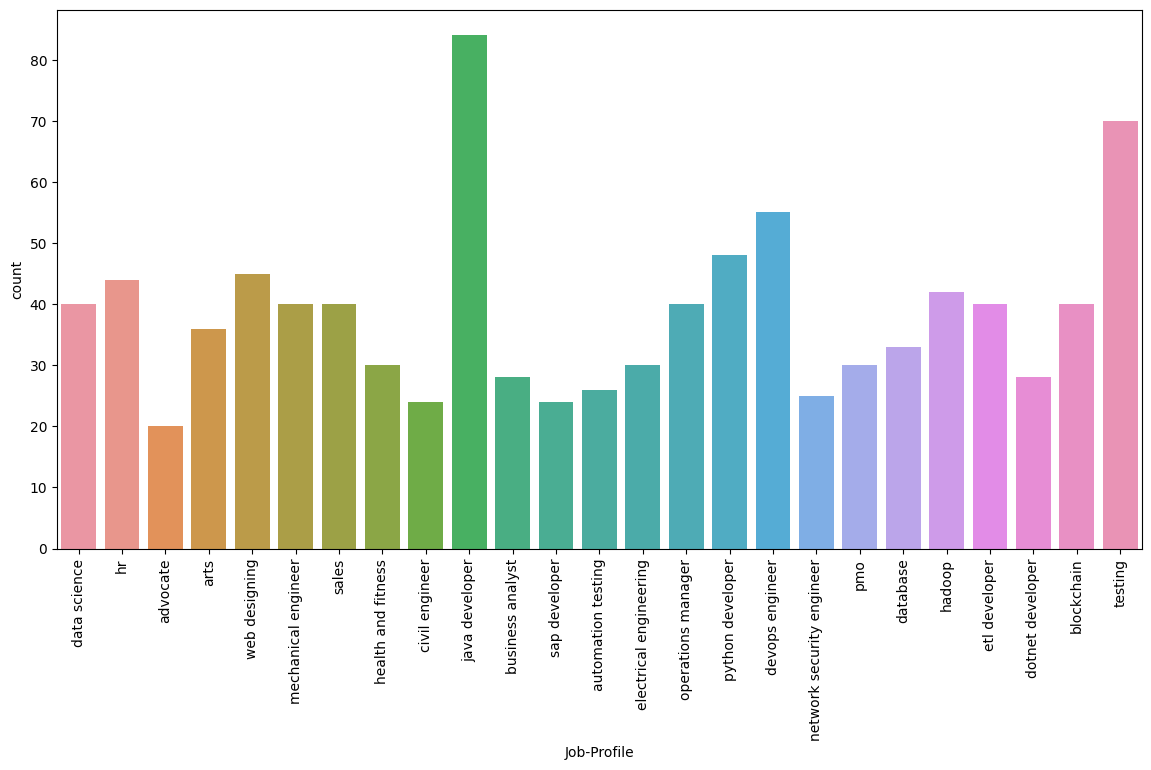

In [191]:
plt.figure(figsize = [14,7])
sns.countplot(x = resume_data['Job-Profile'])
plt.xticks(rotation=90)
plt.show()

### Highest numbers of resumes are given by the java devlopers and database which also shows there popularity and demand in the market.

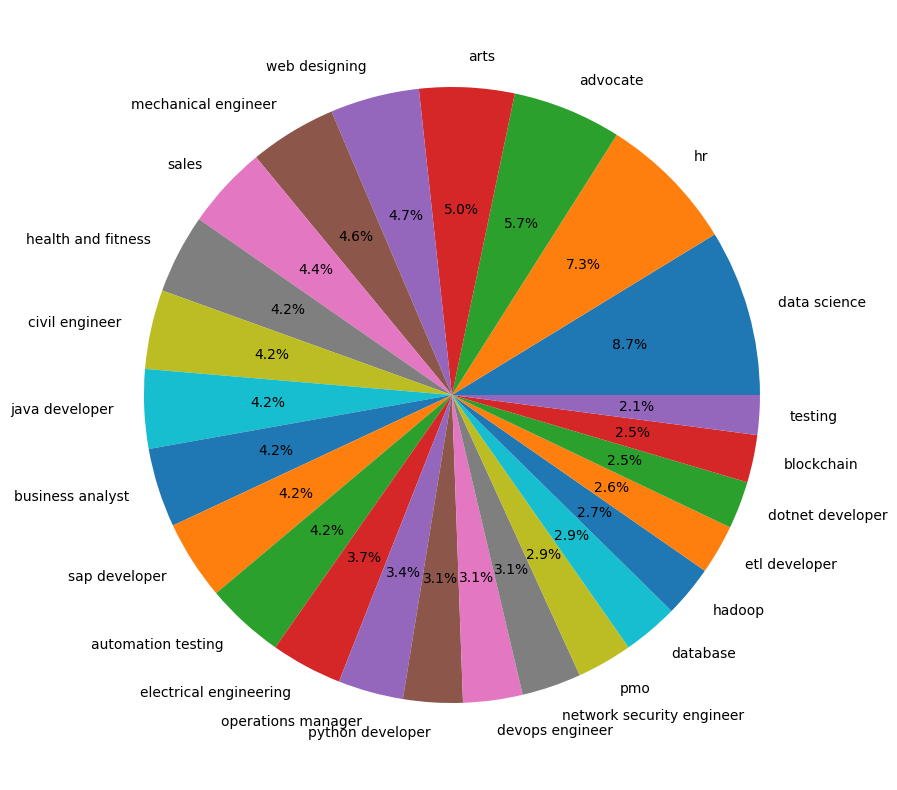

In [192]:
counts= resume_data['Job-Profile'].value_counts()
labels= resume_data['Job-Profile'].unique()
plt.figure(figsize=(15,10)) 
plt.pie(counts,labels=labels,autopct='%1.1f%%')
plt.show()

In [193]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer (stop_words='english') 

tfidf.fit(resume_data['Resume'])
requiredText = tfidf.transform(resume_data['Resume'])

In [194]:
for i in list(requiredText):
    print(i)

  (0, 10445)	0.08250374634458939
  (0, 10421)	0.014823912157260564
  (0, 10330)	0.017344858638538956
  (0, 10322)	0.0959164635520036
  (0, 10321)	0.0479582317760018
  (0, 10320)	0.07903681673152747
  (0, 10142)	0.0479582317760018
  (0, 10141)	0.0479582317760018
  (0, 10126)	0.033981625507207174
  (0, 10045)	0.043455605937842194
  (0, 10041)	0.08383681392723893
  (0, 10025)	0.01595761307225375
  (0, 9997)	0.0479582317760018
  (0, 9961)	0.015348077332232153
  (0, 9950)	0.06270090523951392
  (0, 9945)	0.019738683198148133
  (0, 9937)	0.02731656245476448
  (0, 9900)	0.0479582317760018
  (0, 9824)	0.022323866232721586
  (0, 9823)	0.024141872811628322
  (0, 9718)	0.0479582317760018
  (0, 9695)	0.0479582317760018
  (0, 9591)	0.1929186861994299
  (0, 9580)	0.09796687711321414
  (0, 9526)	0.03752812220441638
  :	:
  (0, 1264)	0.08383681392723893
  (0, 1243)	0.016220551110630914
  (0, 1116)	0.039048140406747193
  (0, 1113)	0.028428701106073682
  (0, 1035)	0.0479582317760018
  (0, 1034)	0.0754634

  (0, 10343)	0.029780202029067886
  (0, 10252)	0.051570122072200346
  (0, 10241)	0.026604231764022778
  (0, 10194)	0.04131479239669211
  (0, 10063)	0.030166264045953812
  (0, 10025)	0.03456653051696694
  (0, 9961)	0.033246186699678056
  (0, 9953)	0.07570896208481863
  (0, 9945)	0.021378441501375706
  (0, 9783)	0.029585840483657356
  (0, 9633)	0.10885764476667706
  (0, 9630)	0.025785061036100173
  (0, 9625)	0.023947906349237044
  (0, 9585)	0.04131479239669211
  (0, 9582)	0.03864241795470957
  (0, 9574)	0.03267418971970356
  (0, 9544)	0.04131479239669211
  (0, 9543)	0.04131479239669211
  (0, 9468)	0.04131479239669211
  (0, 9467)	0.04131479239669211
  (0, 9466)	0.10885764476667706
  (0, 9422)	0.018846984284763987
  (0, 9420)	0.04131479239669211
  (0, 9407)	0.04300893868721999
  (0, 9364)	0.03764905034666286
  :	:
  (0, 1113)	0.06158073641035088
  (0, 1027)	0.03511539853318192
  (0, 925)	0.05917168096731471
  (0, 877)	0.04835676864052918
  (0, 871)	0.05184979577545041
  (0, 852)	0.02936458

In [195]:
len(list(requiredText))

962

In [196]:
resume_data['Category'] = resume_data['Job-Profile'] 

In [197]:
resume_data['Category'].unique()

array(['data science', 'hr', 'advocate', 'arts', 'web designing',
       'mechanical engineer', 'sales', 'health and fitness',
       'civil engineer', 'java developer', 'business analyst',
       'sap developer', 'automation testing', 'electrical engineering',
       'operations manager', 'python developer', 'devops engineer',
       'network security engineer', 'pmo', 'database', 'hadoop',
       'etl developer', 'dotnet developer', 'blockchain', 'testing'],
      dtype=object)

### I have featured this new variable into the dataset because it is neccessary to walk on safe side , as if after the labelencoder if any affect will happen or I am not able to identify that which category is given with unique numerical names that's why I am adding new feature in to our dataset.

In [198]:
from sklearn.preprocessing import LabelEncoder 

label_encode = LabelEncoder() 

label_encode.fit(resume_data['Job-Profile'])

resume_data['Job-Profile'] = label_encode.transform(resume_data['Job-Profile'])

In [199]:
resume_data['Job-Profile'].unique()

array([ 6, 14,  0,  1, 24, 16, 21, 13,  5, 15,  4, 22,  2, 10, 18, 20,  8,
       17, 19,  7, 12, 11,  9,  3, 23])

In [200]:
resume_data['Category'].unique()

array(['data science', 'hr', 'advocate', 'arts', 'web designing',
       'mechanical engineer', 'sales', 'health and fitness',
       'civil engineer', 'java developer', 'business analyst',
       'sap developer', 'automation testing', 'electrical engineering',
       'operations manager', 'python developer', 'devops engineer',
       'network security engineer', 'pmo', 'database', 'hadoop',
       'etl developer', 'dotnet developer', 'blockchain', 'testing'],
      dtype=object)

In [201]:
for i in range(len(resume_data['Category'].unique())):
    print( resume_data['Category'].unique()[i] , " ==> " ,  resume_data['Job-Profile'].unique()[i]  )

data science  ==>  6
hr  ==>  14
advocate  ==>  0
arts  ==>  1
web designing  ==>  24
mechanical engineer  ==>  16
sales  ==>  21
health and fitness  ==>  13
civil engineer  ==>  5
java developer  ==>  15
business analyst  ==>  4
sap developer  ==>  22
automation testing  ==>  2
electrical engineering  ==>  10
operations manager  ==>  18
python developer  ==>  20
devops engineer  ==>  8
network security engineer  ==>  17
pmo  ==>  19
database  ==>  7
hadoop  ==>  12
etl developer  ==>  11
dotnet developer  ==>  9
blockchain  ==>  3
testing  ==>  23


## Importing Machine learning library KNearestClassifier to will provide you the best results based upon the techniques and we also have to import the OneVsRest library because we have to compare the results with the another elements as well as we have more than two categories .

In [202]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier 
from sklearn.metrics import accuracy_score 

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
X_train, X_test, y_train, y_test = train_test_split(requiredText , resume_data['Job-Profile'] , test_size=0.2, random_state=42)

In [205]:
X_train.shape

(769, 10459)

In [206]:
X_test.shape

(193, 10459)

In [207]:
clf = OneVsRestClassifier(KNeighborsClassifier())

In [208]:
clf.fit(X_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [209]:
ypred = clf.predict(X_test)
print (accuracy_score(y_test,ypred))

0.9585492227979274


In [210]:
testing_resume = resume_data['Resume'][10]
testing_resume = clean_resume(testing_resume) 
testing_resume 

'skills  programming languages python pandas numpy scipy scikitlearn matplotlib sql java javascriptjquery  machine learning regression svm naã¯ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca  neural nets  database visualizations mysql sqlserver cassandra hbase elasticsearch d3js dcjs plotly kibana matplotlib ggplot tableau  others regular expression html css angular 6 logstash kafka python flask git docker computer vision  open cv and understanding of deep learningeducation details data science assurance associate data science assurance associate  ernst  young llpskill details javascript exprience  24 monthsjquery exprience  24 monthspython exprience  24 monthscompany details company  ernst  young llpdescription  fraud investigations and dispute services   assurancetechnology assisted reviewtar technology assisted review assists in accelerati

### We are taking here the first id which is being matching best with the category.

In [211]:
category_mapping_for_different_job_profiles = {
    0:'Advocate',
    1:'Arts', 
    2:'Automation Testing',
    3:'Blockchain',
    4:'Business Analyst',
    5:'Civil Engineer',
    6:'Data Science',
    7:'Database',
    8:'DevOps Engineer',
    9:'DotNet Developer',
    10:'ETL Developer', 
    11:'Electrical Engineering',
    12: 'HR',
    13:'Hadoop',
    14:'Health and fitness',  
    15:'Java Developer',
    16:'Mechanical Engineer',
    17:'Network Security Engineer',
    18:'Operations Manager',
    19:'PMO', 
    20:'Python Developer', 
    21:'SAP Developer', 
    22:'Sales',
    23:'Testing',
    24:'Web Designing',
}

In [218]:
def predict_the_resume_category(testing_resume):
    testing_resume = clean_resume(testing_resume)
    input_features = tfidf.transform([testing_resume]) 
    predicted_id = clf.predict(input_features)[0]
    category_name = category_mapping_for_different_job_profiles.get( predicted_id , 'Unknown')
    return f'Your resume is best suited for the Job Profile of {category_name}'
    

In [219]:
predict_the_resume_category(testing_resume)

'Your resume is best suited for the Job Profile of Data Science'

#                                                    CONCLUSION 
#### 1. Our model , is predicting the resumes very well .
#### 2. I have checked various categories of resumes for the different type of Job-Profile.
#### 3. You can also check by putting different resumes into the function predict_the_resume_category in which you will get to know about the resume is preffered for which Job-Profile.